In [1]:
# Inline Chart Parameters
%matplotlib inline

from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 9)

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# Python Imports
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import us
from utils import *
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [11]:
pd.set_option('display.max_columns',99)

polls = pd.read_csv('raw-polls.csv')
polls.head(3)

,pollno,race,year,location,type_simple,type_detail,pollster,partisan,polldate,samplesize,cand1_name,cand1_pct,cand2_name,cand2_pct,cand3_pct,margin_poll,electiondate,cand1_actual,cand2_actual,margin_actual,error,bias,rightcall,comment
0,5380001,1998_House-G_ID-1,1998,ID-1,House-G,House-G,Garin-Hart-Yang Research Group,D,10/13/98,372.0,Democrat,44.0,Republican,42.0,NaN,2.0,11/3/98,44.73,55.27,-10.54,12.54,12.54,0.0,NaN
1,5380002,1998_House-G_ID-2,1998,ID-2,House-G,House-G,Garin-Hart-Yang Research Group,D,10/13/98,400.0,Democrat,42.0,Republican,36.0,NaN,6.0,11/3/98,44.69,52.51,-7.82,13.82,13.82,0.0,NaN
2,5380003,1998_House-G_US,1998,US,House-G,House-G,Zogby Interactive/JZ Analytics,NaN,10/13/98,864.0,Democrat,39.0,Republican,36.0,NaN,3.0,11/3/98,46.42,47.99,-1.57,4.57,4.57,0.0,"previously listed as Zogby Analytics, telephone"


In [4]:
# extracting the presidential polls
pres_polls_national = polls[(polls.type_detail=='Pres-G') & (polls.location == 'US')]
pres_polls_by_state = polls[(polls.type_detail=='Pres-G') & (polls.location != 'US')]

In [19]:
def margin_dotplot(df, x, y, figsize=(16,4)):
    """
    description:
    plot margin_poll (grey), average of margin_poll (white), and
    margin_actual (blue/red)
    """
    data = df.sort_values(by=y)
    fig, ax = plt.subplots(figsize=figsize)
    sns.stripplot(data=data,
                       x='margin_actual', y=y, orient='h', size=15,
                       hue=data['margin_actual'].apply(lambda x: 'D' if x > 0 else 'R'),
                       palette={'D':'blue', 'R': 'red'},
                       jitter=False, alpha=.25, ax=ax)

    sns.stripplot(data=data,
                       x=x, y=y, orient='h', size=15,
                       jitter=False, alpha=.35, color='grey', ax=ax)        
    data = (data.groupby(y)[x]
                .agg({x: 'mean'})
                .sort_values(by=y).reset_index())
    sns.stripplot(data=data,
                  x=x, y=y, orient='h', size=15,
                  color='white', linewidth=1, jitter=False, ax=ax)    
        
    plt.axvline(x=0, color='black', linewidth=0.8)
    ax.xaxis.grid(True)
    ax.yaxis.grid(True)

def dotplot(df, x, y, figsize=(16,4)):
    """
    description:
    plot any arbitray x (grey) and y with the average of x (white)
    """
    data = df.sort_values(by=y)
    fig, ax = plt.subplots(figsize=figsize)
    sns.stripplot(data=data,
                       x=x, y=y, orient='h', size=15,
                       jitter=False, alpha=.35, color='grey', ax=ax)
    data = data.groupby(y)[x].agg({x: 'mean'}).sort_values(by=y).reset_index()
    sns.stripplot(data=data,
                  x=x, y=y, orient='h', size=15,
                  color='white', linewidth=1, jitter=False, ax=ax)
    plt.axvline(x=0, color='black', linewidth=0.8)
    ax.xaxis.grid(True)
    ax.yaxis.grid(True)

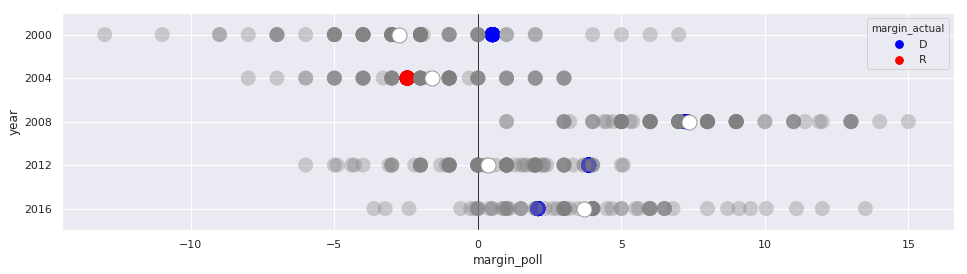

In [20]:
# Lets look at the Nationwide popular vote. First, an exploratory visualization.
margin_dotplot(pres_polls_national, x='margin_poll', y='year')

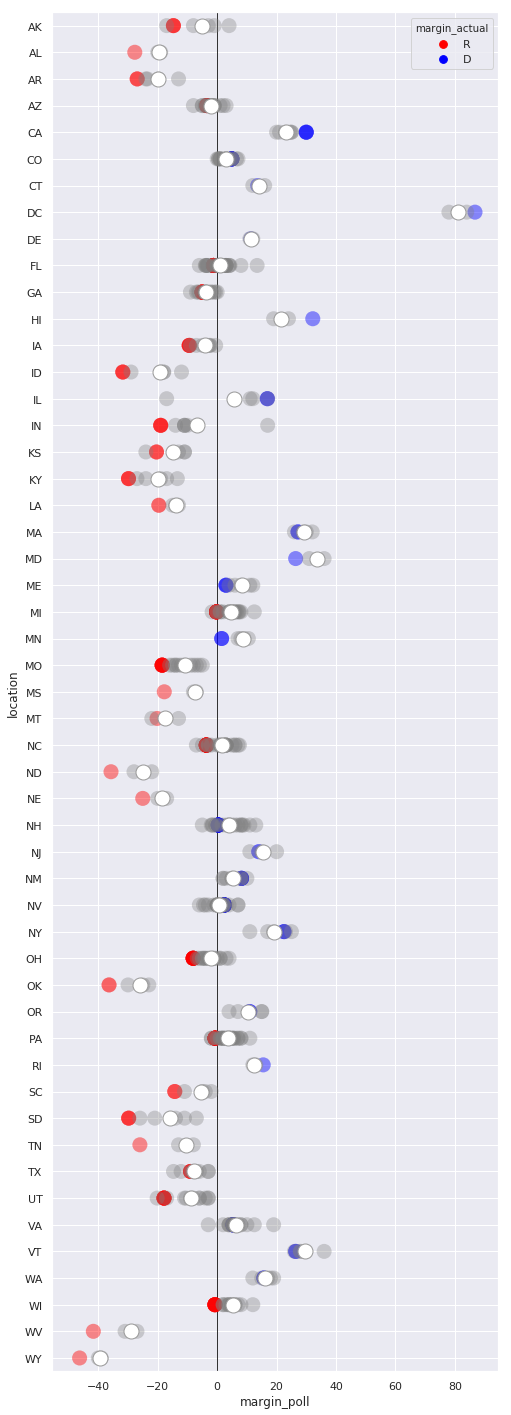

In [21]:
pres_polls_by_state_2016 = pres_polls_by_state[pres_polls_by_state.year == 2016]
margin_dotplot(pres_polls_by_state_2016, x='margin_poll', y='location', figsize=(8,25))

In [25]:
pres_polls_by_state_2016.sort_values('error', ascending=False).head()

,pollno,race,year,location,type_simple,type_detail,pollster,partisan,polldate,samplesize,cand1_name,cand1_pct,cand2_name,cand2_pct,cand3_pct,margin_poll,electiondate,cand1_actual,cand2_actual,margin_actual,error,bias,rightcall,comment
8267,76563,2016_Pres-G_IN,2016,IN,Pres-G,Pres-G,SurveyMonkey,NaN,11/4/16,1823.0,Democrat,52.0,Republican,35.0,6.0,17.0,11/8/16,37.46,56.47,-19.01,36.01,36.01,0.0,NaN
8266,76564,2016_Pres-G_IL,2016,IL,Pres-G,Pres-G,SurveyMonkey,NaN,11/4/16,1700.0,Democrat,35.0,Republican,52.0,10.0,-17.0,11/8/16,55.24,38.36,16.89,33.89,-33.89,0.0,NaN
7593,74083,2016_Pres-G_SD,2016,SD,Pres-G,Pres-G,"Mason-Dixon Polling & Research, Inc.",NaN,10/19/16,400.0,Democrat,37.0,Republican,44.0,7.0,-7.0,11/8/16,31.74,61.53,-29.79,22.79,22.79,1.0,NaN
7773,74751,2016_Pres-G_ID,2016,ID,Pres-G,Pres-G,Google Consumer Surveys,NaN,10/26/16,417.0,Democrat,29.0,Republican,41.0,17.0,-12.0,11/8/16,27.48,59.25,-31.76,19.76,19.76,1.0,NaN
7611,74087,2016_Pres-G_SD,2016,SD,Pres-G,Pres-G,Remington Research Group,NaN,10/20/16,1115.0,Democrat,37.0,Republican,48.0,6.0,-11.0,11/8/16,31.74,61.53,-29.79,18.79,18.79,1.0,NaN


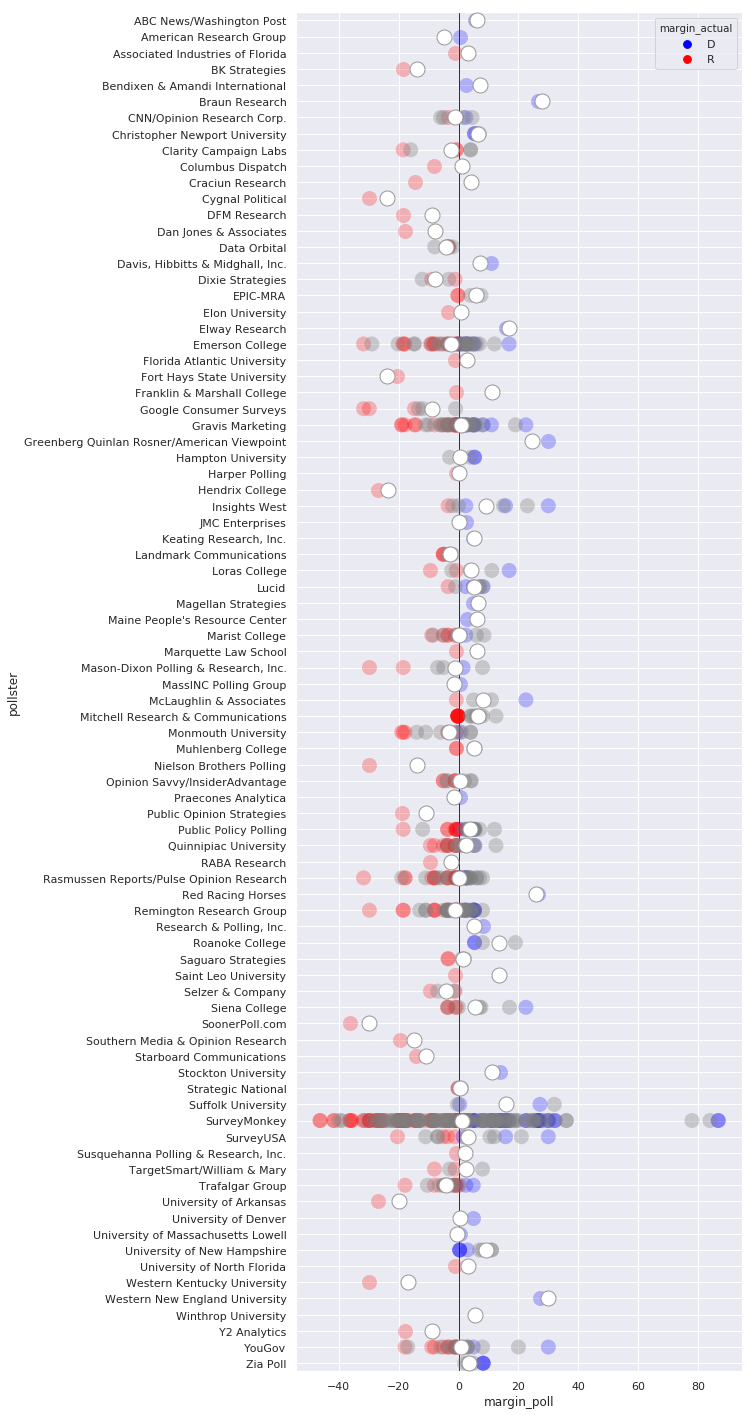

In [26]:
# graphing by pollster
pres_polls_by_state_2016 = pres_polls_by_state[pres_polls_by_state.year == 2016]
margin_dotplot(pres_polls_by_state_2016, x='margin_poll', y='pollster', figsize=(8,25))

In [33]:
# count how many polls each pollster did in 2016
# and save that as a new column
pres_polls_by_state_2016['poll_counts'] = pres_polls_by_state_2016.groupby(['pollster'])['error'].transform('count')
pres_polls_by_state_2016.sort_values('poll_counts', ascending=False).head()

,pollno,race,year,location,type_simple,type_detail,pollster,partisan,polldate,samplesize,cand1_name,cand1_pct,cand2_name,cand2_pct,cand3_pct,margin_poll,electiondate,cand1_actual,cand2_actual,margin_actual,error,bias,rightcall,comment,poll_counts
8275,76572,2016_Pres-G_MI,2016,MI,Pres-G,Pres-G,SurveyMonkey,NaN,11/4/16,3145.0,Democrat,44.0,Republican,42.0,8.0,2.0,11/8/16,47.03,47.25,-0.22,2.22,2.22,0.0,NaN,102
7882,74958,2016_Pres-G_ME,2016,ME,Pres-G,Pres-G,SurveyMonkey,NaN,10/28/16,432.0,Democrat,49.0,Republican,37.0,6.0,12.0,11/8/16,47.83,44.87,2.96,9.04,9.04,1.0,NaN,102
8285,76579,2016_Pres-G_NH,2016,NH,Pres-G,Pres-G,SurveyMonkey,NaN,11/4/16,696.0,Democrat,47.0,Republican,38.0,10.0,9.0,11/8/16,46.83,46.46,0.37,8.63,8.63,1.0,NaN,102
7884,74962,2016_Pres-G_MN,2016,MN,Pres-G,Pres-G,SurveyMonkey,NaN,10/28/16,773.0,Democrat,46.0,Republican,37.0,9.0,9.0,11/8/16,46.44,44.93,1.51,7.49,7.49,1.0,NaN,102
8272,76570,2016_Pres-G_MD,2016,MD,Pres-G,Pres-G,SurveyMonkey,NaN,11/4/16,1216.0,Democrat,59.0,Republican,28.0,6.0,31.0,11/8/16,60.33,33.91,26.42,4.58,4.58,1.0,NaN,102


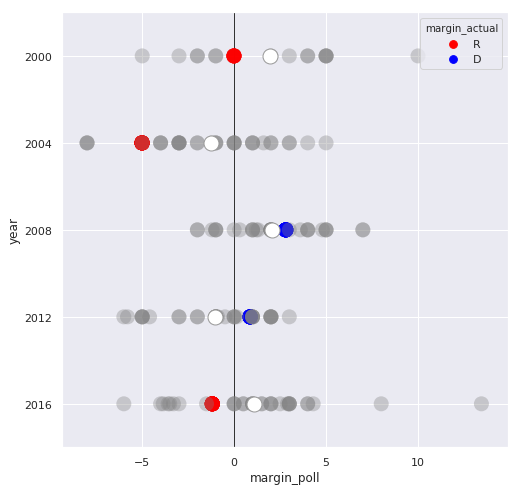

In [35]:
pres_polls_florida_all_years = pres_polls_by_state[pres_polls_by_state.location=='FL']
margin_dotplot(pres_polls_florida_all_years, x='margin_poll', y='year', figsize=(8,8))